<a href="https://colab.research.google.com/github/alby1976/Datahub/blob/master/data607/lecture/DATA607__2021_02_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = data.data # measurements
y = data.target # class labels

In [ ]:
print(f"X.shape={X.shape}, y.shape={y.shape}")
print(y)

X.shape=(569, 30), y.shape=(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1

In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
X[5,:]

array([1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01, 1.700e-01,
       1.578e-01, 8.089e-02, 2.087e-01, 7.613e-02, 3.345e-01, 8.902e-01,
       2.217e+00, 2.719e+01, 7.510e-03, 3.345e-02, 3.672e-02, 1.137e-02,
       2.165e-02, 5.082e-03, 1.547e+01, 2.375e+01, 1.034e+02, 7.416e+02,
       1.791e-01, 5.249e-01, 5.355e-01, 1.741e-01, 3.985e-01, 1.244e-01])

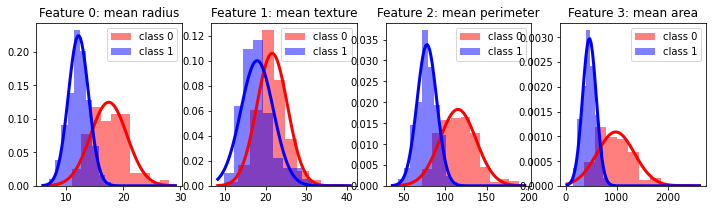

In [ ]:
from matplotlib import pyplot as plt
# from scipy.stats import norm

means0 = np.mean(X[y == 0, :], axis=0)
stds0 = np.std(X[y == 0, :], axis=0)

means1 = np.mean(X[y == 1, :], axis=0)
stds1 = np.std(X[y == 1, :], axis=0)

def f(x, m, s):
  return np.exp(-0.5*(x - m)**2/s**2)/np.sqrt(2*np.pi*s**2)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, ax in enumerate(axes):
  ax.hist(X[y == 0, i], color=(1,0,0,0.5), label="class 0", density=True)
  ax.hist(X[y == 1, i],  color=(0,0,1,0.5),label="class 1", density=True)
  xmin, xmax = ax.get_xlim()
  xs = np.linspace(xmin, xmax, 100)
  ax.plot(xs, f(xs, means0[i], stds0[i]), color=(1,0,0), lw=3)
  ax.plot(xs, f(xs, means1[i], stds1[i]), color=(0,0,1), lw=3)
  ax.set_title(f"Feature {i}: {data.feature_names[i]}")
  ax.legend();
# color = (R, G, B, O) O = Opacity

## Bayes' classifier

$$
p(Y=1\mid X=x) = \frac{p(X=x\mid Y=1)p(Y=1)}
{p(X=x\mid Y=0)p(Y=0) + p(X=x\mid Y=1)p(Y=1)}
$$

In [ ]:
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

norm = multivariate_normal.pdf

np.random.seed(42) # important for repeatability

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

# fit the model (training data)
mean0 = np.mean(X_tr[y_tr == 0, :], axis=0)
mean1 = np.mean(X_tr[y_tr == 1, :], axis=0)
cov0 = np.cov(X_tr[y_tr == 0,:].T) # see below for explanation of transpose
cov1 = np.cov(X_tr[y_tr == 1,:].T)
pY0 = 1 - np.mean(y_tr)
pY1 = np.mean(y_tr)

# prediction (testing data)
pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

acc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"testing accuracy = {acc}")

testing accuracy = 0.9385964912280702


In [ ]:
Z = X - X.mean(axis=0)
C = Z.T @ Z / (len(Z) - 1)
C[:3,:3]

array([[ 12.41892013,   4.90758156,  85.44714166],
       [  4.90758156,  18.49890868,  34.43975917],
       [ 85.44714166,  34.43975917, 590.44047952]])

In [ ]:
np.cov(X, rowvar=False)[:3,:3]

array([[ 12.41892013,   4.90758156,  85.44714166],
       [  4.90758156,  18.49890868,  34.43975917],
       [ 85.44714166,  34.43975917, 590.44047952]])

## $K$-class classification, $K>2$

In [ ]:
from sklearn.datasets import load_digits # MNIST dataset

In [ ]:
X, y = load_digits(return_X_y=True)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_tr.shape, X_te.shape)

(1437, 64) (360, 64)


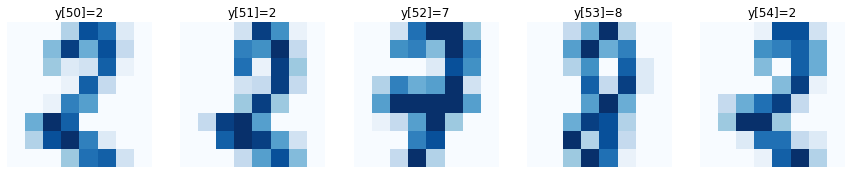

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
m = 50
for j, ax in enumerate(axes):
  i = j + m
  ax.set_axis_off()
  ax.set_title(f"y[{i}]={y[i]}")
  ax.imshow(X[i,:].reshape((8,8)), cmap="Blues")

In [ ]:
print(f"classes = {set(y)}")

classes = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
# Model image as a 64-dimensional Gaussian

# fitting the model (training data)
means = [np.mean(X_tr[y_tr == c, :], axis=0) for c in range(10)] # list comprehensions
covs = [np.cov(X_tr[y_tr == c, :].T) for c in range(10)]
priors = np.array([np.mean(y_tr == c) for c in range(10)])

# prediction (test data)
pXxYc = np.array([multivariate_normal.pdf(X_te, mean=mean, cov=cov, allow_singular=True) for (mean, cov) in zip(means, covs)])
posteriors = pXxYc*priors.reshape(10,1) # broadcasting!!
y_pred = np.argmax(posteriors, axis=0)
acc = np.mean(y_pred == y_te)

In [ ]:
a = np.array([[1,2,5,6], [5,5,5,5]])

In [ ]:
a[:, np.newaxis,:]

array([[[1, 2, 5, 6]],

       [[5, 5, 5, 5]]])

In [ ]:
a.reshape(2, 1, -1)

array([[[1, 2, 5, 6]],

       [[5, 5, 5, 5]]])

In [ ]:
a.reshape((4, 2))

array([[1, 2],
       [5, 6],
       [5, 5],
       [5, 5]])